In [2]:
## load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from datetime import datetime
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from scipy import stats
from scipy.stats import poisson, ttest_ind

In [42]:
## load data on ghg data
biking_2013 = pd.read_csv("201306-citibike-tripdata.csv")
biking_2013 = biking_2013.rename(columns={"birth year":"birthyear"})
biking_2013.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birthyear,gender
0,695,2013-06-01 00:00:01,2013-06-01 00:11:36,444,Broadway & W 24 St,40.742354,-73.989151,434.0,9 Ave & W 18 St,40.743174,-74.003664,19678,Subscriber,1983.0,1
1,693,2013-06-01 00:00:08,2013-06-01 00:11:41,444,Broadway & W 24 St,40.742354,-73.989151,434.0,9 Ave & W 18 St,40.743174,-74.003664,16649,Subscriber,1984.0,1
2,2059,2013-06-01 00:00:44,2013-06-01 00:35:03,406,Hicks St & Montague St,40.695128,-73.995951,406.0,Hicks St & Montague St,40.695128,-73.995951,19599,Customer,NaN,0
3,123,2013-06-01 00:01:04,2013-06-01 00:03:07,475,E 15 St & Irving Pl,40.735243,-73.987586,262.0,Washington Park,40.691782,-73.973730,16352,Subscriber,1960.0,1
4,1521,2013-06-01 00:01:22,2013-06-01 00:26:43,2008,Little West St & 1 Pl,40.705693,-74.016777,310.0,State St & Smith St,40.689269,-73.989129,15567,Subscriber,1983.0,1


In [43]:
biking_2019 = pd.read_csv("201906-citibike-tripdata.csv")
biking_2019 = biking_2019.rename(columns={"birth year":"birthyear"})
biking_2019.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birthyear,gender
0,330,2019-06-01 00:00:01.5000,2019-06-01 00:05:31.7600,3602,31 Ave & 34 St,40.763154,-73.920827,3570,35 Ave & 37 St,40.755733,-73.923661,20348,Subscriber,1992,1
1,830,2019-06-01 00:00:04.2400,2019-06-01 00:13:55.1470,3054,Greene Ave & Throop Ave,40.689493,-73.942061,3781,Greene Av & Myrtle Av,40.698568,-73.918877,34007,Subscriber,1987,2
2,380,2019-06-01 00:00:06.0190,2019-06-01 00:06:26.7790,229,Great Jones St,40.727434,-73.993790,326,E 11 St & 1 Ave,40.729538,-73.984267,20587,Subscriber,1990,2
3,1155,2019-06-01 00:00:06.7760,2019-06-01 00:19:22.5380,3771,McKibbin St & Bogart St,40.706237,-73.933871,3016,Kent Ave & N 7 St,40.720368,-73.961651,33762,Subscriber,1987,1
4,1055,2019-06-01 00:00:07.5200,2019-06-01 00:17:42.5580,441,E 52 St & 2 Ave,40.756014,-73.967416,3159,W 67 St & Broadway,40.774925,-73.982666,31290,Subscriber,1973,1


In [6]:
len(biking_2019)

2125370

In [7]:
len(biking_2013)

577703

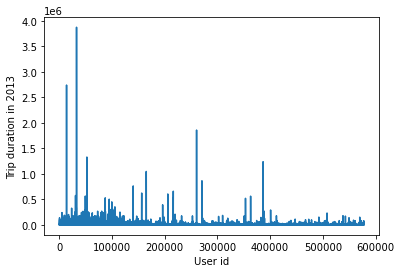

In [18]:
plt.plot(biking_2013["tripduration"])
plt.xlabel("User id")
plt.ylabel("Trip duration in 2013")
plt.show()

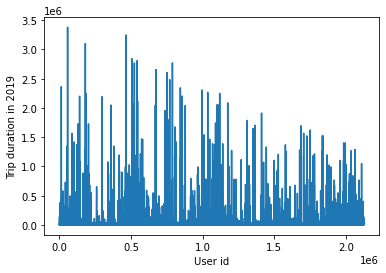

In [19]:
plt.plot(biking_2019["tripduration"])
plt.xlabel("User id")
plt.ylabel("Trip duration in 2019")
plt.show()

In [26]:
num_subscribers_2013 = biking_2013.query("usertype == 'Subscriber'")
len(num_subscribers_2013)

337384

In [27]:
num_subscribers_2019 = biking_2019.query("usertype == 'Subscriber'")
len(num_subscribers_2019)

1752526

In [29]:
percent_subscribers_2013 = len(num_subscribers_2013) / len(biking_2013)
print("The percent of subscribers in 2013 is " + "{:.2%}".format(percent_subscribers_2013))

The percent of subscribers in 2013 is 58.40%


In [30]:
percent_subscribers_2019 = len(num_subscribers_2019) / len(biking_2019)
print("The percent of subscribers in 2019 is " + "{:.2%}".format(percent_subscribers_2019))

The percent of subscribers in 2019 is 82.46%


In [31]:
##Percent change in subscribers from 2013 to 2019
percent_change = (len(num_subscribers_2019) - len(num_subscribers_2013) ) / len(num_subscribers_2013)
print("The percent of change of subscribers from 2013 to 2019 is " + "{:.2%}".format(percent_change))

The percent of change of subscribers from 2013 to 2019 is 419.45%


In [45]:
biking_2013_subset = biking_2013.query('birthyear > 1920 & gender > 0')
biking_2013_subset = biking_2013_subset.reset_index(level=0)
biking_2013_subset.head()

,index,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birthyear,gender
0,0,695,2013-06-01 00:00:01,2013-06-01 00:11:36,444,Broadway & W 24 St,40.742354,-73.989151,434.0,9 Ave & W 18 St,40.743174,-74.003664,19678,Subscriber,1983.0,1
1,1,693,2013-06-01 00:00:08,2013-06-01 00:11:41,444,Broadway & W 24 St,40.742354,-73.989151,434.0,9 Ave & W 18 St,40.743174,-74.003664,16649,Subscriber,1984.0,1
2,3,123,2013-06-01 00:01:04,2013-06-01 00:03:07,475,E 15 St & Irving Pl,40.735243,-73.987586,262.0,Washington Park,40.691782,-73.973730,16352,Subscriber,1960.0,1
3,4,1521,2013-06-01 00:01:22,2013-06-01 00:26:43,2008,Little West St & 1 Pl,40.705693,-74.016777,310.0,State St & Smith St,40.689269,-73.989129,15567,Subscriber,1983.0,1
4,6,2057,2013-06-01 00:02:33,2013-06-01 00:36:50,285,Broadway & E 14 St,40.734546,-73.990741,532.0,S 5 Pl & S 5 St,40.710451,-73.960876,15693,Subscriber,1991.0,1


In [46]:
biking_2019_subset = biking_2019.query('birthyear > 1920 & gender > 0')
biking_2019_subset = biking_2019_subset.reset_index(level=0)
biking_2019_subset.head()

,index,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birthyear,gender
0,0,330,2019-06-01 00:00:01.5000,2019-06-01 00:05:31.7600,3602,31 Ave & 34 St,40.763154,-73.920827,3570,35 Ave & 37 St,40.755733,-73.923661,20348,Subscriber,1992,1
1,1,830,2019-06-01 00:00:04.2400,2019-06-01 00:13:55.1470,3054,Greene Ave & Throop Ave,40.689493,-73.942061,3781,Greene Av & Myrtle Av,40.698568,-73.918877,34007,Subscriber,1987,2
2,2,380,2019-06-01 00:00:06.0190,2019-06-01 00:06:26.7790,229,Great Jones St,40.727434,-73.993790,326,E 11 St & 1 Ave,40.729538,-73.984267,20587,Subscriber,1990,2
3,3,1155,2019-06-01 00:00:06.7760,2019-06-01 00:19:22.5380,3771,McKibbin St & Bogart St,40.706237,-73.933871,3016,Kent Ave & N 7 St,40.720368,-73.961651,33762,Subscriber,1987,1
4,4,1055,2019-06-01 00:00:07.5200,2019-06-01 00:17:42.5580,441,E 52 St & 2 Ave,40.756014,-73.967416,3159,W 67 St & Broadway,40.774925,-73.982666,31290,Subscriber,1973,1


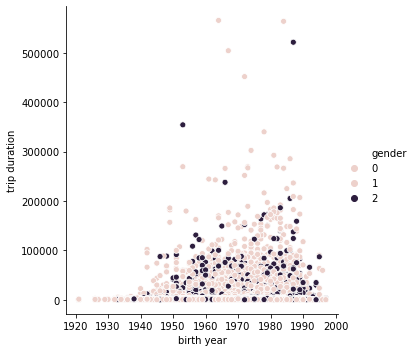

In [49]:
sns.relplot(x="birthyear", y="tripduration", hue="gender", data=biking_2013_subset)
plt.xlabel("birth year")
plt.ylabel("trip duration")
plt.show()

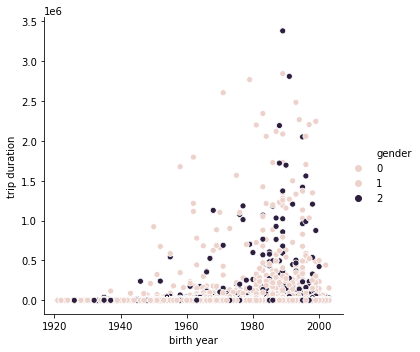

In [50]:
sns.relplot(x="birthyear", y="tripduration", hue="gender", data=biking_2019_subset)
plt.xlabel("birth year")
plt.ylabel("trip duration")
plt.show()